# 2.If we define daily gain or loss of a stock is the % of change of the stock closing price to previous day closing price. Compute daily gain or loss for each S&P500 company. Do the same thing for weekly and monthly gains or losses. 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

In [2]:
import requests
import urllib
from bs4 import BeautifulSoup
import re
import io
import gzip
import time
import csv
import os
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from webdriver_manager.chrome import ChromeDriverManager
from multiprocessing import Pool
import import_ipynb
import pandas as pd
from ipynb.fs.full.scraping_daily import scraping_daily

driver = webdriver.Chrome(ChromeDriverManager().install())
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
driver.get(url)

symbols = list()
symbols_GICC = dict()

table = "/html/body/div[3]/div[3]/div[5]/div[1]/table[1]"
table = driver.find_element_by_xpath(table)
elements = table.find_elements_by_tag_name("tr")[1:]

for row in elements:
    data = [data.text for data in row.find_elements_by_tag_name("td")]
    symbols.append(data[0])
    symbols_GICC[data[0]] = data[3]

print(len(symbols_GICC))



====== WebDriver manager ======
Current google-chrome version is 91.0.4472
Get LATEST driver version for 91.0.4472
Driver [C:\Users\lenovo\.wdm\drivers\chromedriver\win32\91.0.4472.101\chromedriver.exe] found in cache


505


In [9]:
top_gain_loss_daily = pd.DataFrame(columns=["symbol","gain_loss","GICS"])
top_gain_loss_weekly = pd.DataFrame(columns=["symbol","gain_loss","GICS"])
top_gain_loss_monthly = pd.DataFrame(columns=["symbol","gain_loss","GICS"])

In [4]:
daily_dfs = {}
weekly_dfs = {}
monthly_dfs = {}


def gain_loss(sym):
    df_daily = pd.read_csv(sym +"_daily" + ".csv")
    df_daily["Gain/Loss"] = (df_daily["Close"] - df_daily["Close"].shift(1)) / df_daily["Close"]
    daily_dfs[sym] = df_daily

    df_weekly = pd.read_csv(sym +"_weekly"+".csv")
    df_weekly["Gain/Loss"] = (df_weekly["Close"] - df_weekly["Close"].shift(1)) / df_weekly["Close"]
    weekly_dfs[sym] = df_weekly

    df_monthly = pd.read_csv(sym + "_monthly" + ".csv")
    df_monthly["Gain/Loss"] = (df_monthly["Close"] - df_monthly["Close"].shift(1)) / df_weekly["Close"]
    monthly_dfs[sym] = df_monthly
    
    daily = {"symbol":sym,"gain_loss":df_daily["Gain/Loss"].sum(),"GICS":symbols_GICC[sym]}
    weekly = {"symbol":sym,"gain_loss":df_weekly["Gain/Loss"].sum(),"GICS":symbols_GICC[sym]}
    monthly = {"symbol":sym,"gain_loss":df_monthly["Gain/Loss"].sum(),"GICS":symbols_GICC[sym]}
    return (daily,weekly,monthly)

In [5]:
for n in symbols:
    try:
        (daily,weekly,monthly) = gain_loss(n)
        top_gain_loss_daily = top_gain_loss_daily.append(daily, ignore_index=True)
        top_gain_loss_weekly = top_gain_loss_weekly.append(weekly, ignore_index=True)
        top_gain_loss_monthly = top_gain_loss_monthly.append(monthly, ignore_index=True)
    except Exception as e :
        pass

In [6]:
print(top_gain_loss_daily)
print(top_gain_loss_weekly)
print(top_gain_loss_monthly)


    symbol  gain_loss                    GICS
0      MMM   0.022650             Industrials
1      ABT   0.775921             Health Care
2     ABBV   0.402984             Health Care
3     ABMD   0.868232             Health Care
4      ACN   0.782966  Information Technology
..     ...        ...                     ...
117   XRAY  -0.359241             Health Care
118    DVN  -1.624920                  Energy
119   DXCM   0.891089             Health Care
120   DISH  -1.003948  Communication Services
121     DG   0.886248  Consumer Discretionary

[122 rows x 3 columns]
    symbol  gain_loss                    GICS
0      MMM   0.076890             Industrials
1      ABT   0.847760             Health Care
2     ABBV   0.435138             Health Care
3     ABMD   0.891735             Health Care
4      ACN   0.828857  Information Technology
..     ...        ...                     ...
117   XRAY  -0.324052             Health Care
118    DVN  -1.636070                  Energy
119   DXCM

# 3.Top 25 gainers of S&P 500 for 1000 trading days are the companies which have max % gain during those 1000 trading days. Bottom 25 gainers of S&P 500 for 1000 trading days are the companies which have least % gain (it can be negative gain too which is loss) during those 1000 trading days. Compute and draw the correlation matrix for the top 25 and bottom 25 companies for daily gains or losses. This is a matrix with both axes holding the stock names. The color of each cell is the correlation between that pair of stocks: red for -1 and blue for 1. Do the same thing for weekly and monthly gains or losses.

In [7]:
top_gain_loss_daily = top_gain_loss_daily.sort_values(by=["gain_loss"])
top_25_daily = top_gain_loss_daily.head(25)
loss_25_daily = top_gain_loss_daily.tail(25)
top_25_daily_names = list(top_25_daily["symbol"])
loss_25_daily_names = list(loss_25_daily["symbol"])
names = set(loss_25_daily_names+top_25_daily_names)
samp = pd.DataFrame(columns=names,index=names)
for n1,n2 in combinations(names,2):
    df1 = daily_dfs[n1]
    df2 = daily_dfs[n2]
    samp.loc[n1,n2] = df1["Gain/Loss"].corr(df2["Gain/Loss"])
    samp.loc[n2,n1] = df2["Gain/Loss"].corr(df1["Gain/Loss"])
    samp.loc[n1,n1] = 1
    samp.loc[n2,n2] = 1
daily_samp = samp.astype({name:"float" for name in names})
daily_samp.style.background_gradient(cmap="brg")

# Correlation matrix for Weekly data

In [8]:
top_gain_loss_weekly = top_gain_loss_weekly.sort_values(by=["gain_loss"])
top_25_daily = top_gain_loss_weekly.head(25)
loss_25_daily = top_gain_loss_weekly.tail(25)
top_25_daily_names = list(top_25_daily["symbol"])
loss_25_daily_names = list(loss_25_daily["symbol"])
names = set(loss_25_daily_names+top_25_daily_names)
samp = pd.DataFrame(columns=names,index=names)
for n1,n2 in combinations(names,2):
    df1 = daily_dfs[n1]
    df2 = daily_dfs[n2]
    samp.loc[n1,n2] = df1["Gain/Loss"].corr(df2["Gain/Loss"])
    samp.loc[n2,n1] = df2["Gain/Loss"].corr(df1["Gain/Loss"])
    samp.loc[n1,n1] = 1
    samp.loc[n2,n2] = 1
weekly_samp = samp.astype({name:"float" for name in names})
weekly_samp.style.background_gradient(cmap="brg")

# Correlation matrix for monthly data

In [9]:
top_gain_loss_monthly = top_gain_loss_monthly.sort_values(by=["gain_loss"])
top_25_daily = top_gain_loss_monthly.head(25)
loss_25_daily = top_gain_loss_monthly.tail(25)
top_25_daily_names = list(top_25_daily["symbol"])
loss_25_daily_names = list(loss_25_daily["symbol"])
names = set(loss_25_daily_names+top_25_daily_names)
samp = pd.DataFrame(columns=names,index=names)
for n1,n2 in combinations(names,2):
    df1 = daily_dfs[n1]
    df2 = daily_dfs[n2]
    samp.loc[n1,n2] = df1["Gain/Loss"].corr(df2["Gain/Loss"])
    samp.loc[n2,n1] = df2["Gain/Loss"].corr(df1["Gain/Loss"])
    samp.loc[n1,n1] = 1
    samp.loc[n2,n2] = 1
monthly_samp = samp.astype({name:"float" for name in names})
monthly_samp.style.background_gradient(cmap="brg")

# 4.For each company in top 25 and bottom 25, identify their GICS sectors from https://en.wikipedia.org/wiki/List_of_S%26P_500_companies and draw a bar graph depicting number of top 25 and bottom 25 belongs to that sector.  Do the same thing for weekly and monthly data.

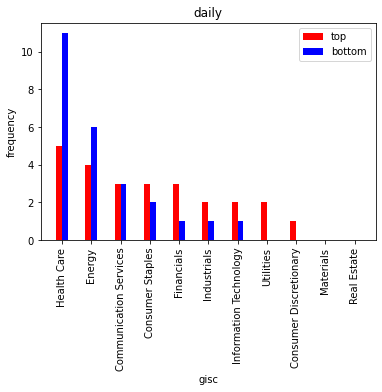

In [11]:
top_25 = dict(top_gain_loss_daily["GICS"].head(25).value_counts())
bottom_25 = dict(top_gain_loss_daily["GICS"].tail(25).value_counts())
labels = set(list(top_25.keys()) + list(bottom_25.keys()))
for lab in labels:
    if lab in top_25:
        pass
    else:
        top_25[lab] = 0
    if lab in bottom_25:
        pass
    else:
        bottom_25[lab] = 0
w = 0.2
ind = np.arange(len(labels))
ind2 = [i+w for i in ind]
plt.bar(ind,top_25.values(),w,color="r",label="top")
plt.bar(ind2,bottom_25.values(),w,color="b",label="bottom")
plt.xlabel("gisc")
plt.ylabel("frequency")
plt.xticks(ind+w/2,labels,rotation=90)
plt.title("daily")
plt.legend()

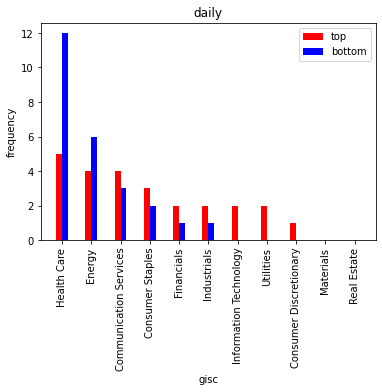

In [12]:
top_25 = dict(top_gain_loss_weekly["GICS"].head(25).value_counts())
bottom_25 = dict(top_gain_loss_weekly["GICS"].tail(25).value_counts())
labels = set(list(top_25.keys()) + list(bottom_25.keys()))
labels
for lab in labels:
    if lab in top_25:
        pass
    else:
        top_25[lab] = 0
    if lab in bottom_25:
        pass
    else:
        bottom_25[lab] = 0
w = 0.2
ind = np.arange(len(labels))
ind2 = [i+w for i in ind]
plt.bar(ind,top_25.values(),w,color="r",label="top")
plt.bar(ind2,bottom_25.values(),w,color="b",label="bottom")
plt.xlabel("gisc")
plt.ylabel("frequency")
plt.xticks(ind+w/2,labels,rotation=90)
plt.title("daily")
plt.legend()

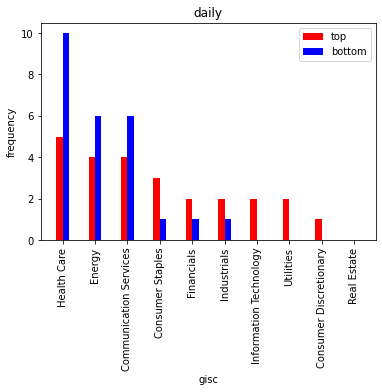

In [13]:
top_25 = dict(top_gain_loss_monthly["GICS"].head(25).value_counts())
bottom_25 = dict(top_gain_loss_monthly["GICS"].tail(25).value_counts())
labels = set(list(top_25.keys()) + list(bottom_25.keys()))
labels
for lab in labels:
    if lab in top_25:
        pass
    else:
        top_25[lab] = 0
    if lab in bottom_25:
        pass
    else:
        bottom_25[lab] = 0
        # top,bottom
w = 0.2
ind = np.arange(len(labels))
ind2 = [i+w for i in ind]
plt.bar(ind,top_25.values(),w,color="r",label="top")
plt.bar(ind2,bottom_25.values(),w,color="b",label="bottom")
plt.xlabel("gisc")
plt.ylabel("frequency")
plt.xticks(ind+w/2,labels,rotation=90)
plt.title("daily")
plt.legend()

# 5.For the top 2 companies, find the maximum negatively correlated companies in the remaining 48 companies from the correlation matrix.  Using Tornado templates, draw sparkline plots of the 4 companies of their daily gains or losses in the same chart. Do the same thing for weekly and monthly gains or losses. Do the same thing for bottom 2 companies. Convert these files into PDF without using a browser. 

In [14]:
import base64


def spark_line(data, figsize=(4, 0.25), **kwags):
    """
    Returns a HTML image tag containing a base64 encoded sparkline style plot
    """
    data = list(data)

    fig, ax = plt.subplots(1, 1, figsize=figsize, **kwags)
    ax.plot(data)
    for k,v in ax.spines.items():
        v.set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])

    plt.plot(len(data) - 1, data[len(data) - 1], 'r.')

    ax.fill_between(range(len(data)), data, len(data)*[min(data)], alpha=0.1)

    img = io.BytesIO()
    plt.savefig(img, transparent=True, bbox_inches='tight')
    img.seek(0)
    plt.close()

    return base64.b64encode(img.read()).decode("UTF-8")

In [15]:
top_four = list()
top_2 = top_gain_loss_daily.head(2)
for sym in top_2["symbol"]:
    tsym = daily_samp[sym].sort_values().index[0]
    top_four.append(sym)
    top_four.append(tsym)
all_values = list()
for num in top_four:
    val = list(daily_dfs[num]["Gain/Loss"].dropna().values)
    all_values.append(val)
with open("spark1.html", "a") as file:
        file.write('<div>Daily top</div>')
        for value in all_values:
            file.write('<div><img src="data:image/png;base64,{}"/></div>'.format(spark_line(value)))
        file.write('<div></div>')

bottom_four = list()
bottom_2 = top_gain_loss_daily.tail(2)
for sym in bottom_2["symbol"]:
    tsym = daily_samp[sym].sort_values().index[0]
    bottom_four.append(sym)
    bottom_four.append(tsym)
all_values = list()
for num in bottom_four:
    val = list(daily_dfs[num]["Gain/Loss"].dropna().values)
    all_values.append(val)
with open("spark1.html", "a") as file:
        file.write('<div>Daily bottom</div>')
        for value in all_values:
            file.write('<div><img src="data:image/png;base64,{}"/></div>'.format(spark_line(value)))
        file.write('<div></div>')

In [16]:
top_four = list()
top_2 = top_gain_loss_weekly.head(2)
for sym in top_2["symbol"]:
    tsym = weekly_samp[sym].sort_values().index[0]
    top_four.append(sym)
    top_four.append(tsym)
all_values = list()
for num in top_four:
    val = list(weekly_dfs[num]["Gain/Loss"].dropna().values)
    all_values.append(val)
with open("spark1.html", "a") as file:
        file.write('<div>Weekly top</div>')
        for value in all_values:
            file.write('<div><img src="data:image/png;base64,{}"/></div>'.format(spark_line(value)))
        file.write('<div></div>')

bottom_four = list()
bottom_2 = top_gain_loss_weekly.tail(2)
for sym in bottom_2["symbol"]:
    tsym = weekly_samp[sym].sort_values().index[0]
    bottom_four.append(sym)
    bottom_four.append(tsym)
all_values = list()
for num in bottom_four:
    val = list(weekly_dfs[num]["Gain/Loss"].dropna().values)
    all_values.append(val)
with open("spark1.html", "a") as file:
        file.write('<div>Weekly bottom</div>')
        for value in all_values:
            file.write('<div><img src="data:image/png;base64,{}"/></div>'.format(spark_line(value)))
        file.write('<div></div>')

In [17]:
top_four = list()
top_2 = top_gain_loss_monthly.head(2)
for sym in top_2["symbol"]:
    tsym = monthly_samp[sym].sort_values().index[0]
    top_four.append(sym)
    top_four.append(tsym)
all_values = list()
for num in top_four:
    val = list(monthly_dfs[num]["Gain/Loss"].dropna().values)
    all_values.append(val)
with open("spark1.html", "a") as file:
        file.write('<div>Monthly top</div>')
        for value in all_values:
            file.write('<div><img src="data:image/png;base64,{}"/></div>'.format(spark_line(value)))
        file.write('<div></div>')

bottom_four = list()
bottom_2 = top_gain_loss_monthly.tail(2)
for sym in bottom_2["symbol"]:
    tsym = monthly_samp[sym].sort_values().index[0]
    bottom_four.append(sym)
    bottom_four.append(tsym)
all_values = list()
for num in bottom_four:
    val = list(monthly_dfs[num]["Gain/Loss"].dropna().values)
    all_values.append(val)
with open("spark1.html", "a") as file:
        file.write('<div>Monthly bottom</div>')
        for value in all_values:
            file.write('<div><img src="data:image/png;base64,{}"/></div>'.format(spark_line(value)))
        file.write('<div></div>')

In [18]:
import pdfcrowd

client = pdfcrowd.HtmlToPdfClient('demo', 'ce544b6ea52a5621fb9d55f8b542d14d')
client.convertFileToFile('spark1.html', 'spark1.pdf')